In [2]:
import pandas as pd
from datetime import datetime, timedelta
import sys

import cwms

In [3]:
apiRoot="https://cwms-data-test.cwbi.us//cwms-data/"
api = cwms.api.init_session(api_root=apiRoot)

# Pandas Overview

This is a quick overview of pandas functions using cwms data as an example.  This tutorial will include sub setting data, string functions, renaming columns, setting the index as merging dataframes together.  Timeseries and location groups are used as the example datasets.  

### Grab Timeseries group and then subset the data

In [4]:
df = cwms.get_timeseries_group(group_id="USGS TS Data Acquisition",category_id="Data Acquisition",office_id="CWMS").df

In [5]:
df

,office-id,timeseries-id,ts-code,alias-id,attribute
0,SWG,Barker-Gate 3.Flow.Inst.15Minutes.0.USGS-Rev,32383149,299979,0.0
1,SWL,Newport.Precip-Cum.Inst.1Hour.0.Decodes-rev,167708150,07074500,0.0
2,SWL,Newport.Stage.Inst.1Hour.0.Decodes-rev,4863150,07074500,0.0
3,SWL,Newport.Flow.Inst.1Hour.0.CCP-Comp,17740150,07074500,0.0
4,SWL,Bryant_Ck_Tecum.Stage.Inst.15Minutes.0.Iridium...,631544150,07058000,0.0
...,...,...,...,...,...
1331,MVM,Pendleton.Stage.Inst.15Minutes.0.opendcs-raw,193556014,NaN,NaN
1332,MVM,LaGrange.Stage.Inst.15Minutes.0.opendcs-raw,192957014,NaN,NaN
1333,MVM,Greenfield.Stage.Inst.15Minutes.0.opendcs-raw,195211014,NaN,NaN
1334,MVM,Walnut.Stage.Inst.15Minutes.0.opendcs-raw,196456014,NaN,NaN


In [6]:
df['office-id'].unique()

array(['SWG', 'SWL', 'SAS', 'SAW', 'SPL', 'LRL', 'MVP', 'MVR', 'NAE',
       'NWDP', 'SAJ', 'SWF', 'SPA', 'MVM', 'LRH', 'LRN'], dtype=object)

In [7]:
df['office-id'].value_counts()

office-id
LRL     492
MVR     480
SAS     166
SWF      76
SAJ      50
MVM      33
SWG       8
MVP       6
NWDP      5
SWL       4
SAW       4
SPA       4
LRH       4
SPL       2
NAE       1
LRN       1
Name: count, dtype: int64

#### create a subset based on office

In [8]:
#create a boolean condition on what rows to keep
df['office-id']=='SWG'

0        True
1       False
2       False
3       False
4       False
        ...  
1331    False
1332    False
1333    False
1334    False
1335    False
Name: office-id, Length: 1336, dtype: bool

In [9]:
# apply that boolean condition to the dataframe ans assign it to a new dataframe.  Only "True" rows will be kept
df_office = df[df['office-id']=='SWG']

In [10]:
df_office

,office-id,timeseries-id,ts-code,alias-id,attribute
0,SWG,Barker-Gate 3.Flow.Inst.15Minutes.0.USGS-Rev,32383149,299979,0.0
62,SWG,Addicks-Gate 3.Flow.Inst.15Minutes.0.USGS-Rev,32384149,300027,0.0
63,SWG,Addicks-Gate 1.Flow.Inst.15Minutes.0.USGS-Rev,32381149,300028,0.0
64,SWG,Addicks-Gate 2.Flow.Inst.15Minutes.0.USGS-Rev,32382149,300029,0.0
65,SWG,Addicks-Gated_Total.Flow.Inst.15Minutes.0.USGS...,32408149,300048,0.0
66,SWG,Barker-Gate 1.Flow.Inst.15Minutes.0.USGS-Rev,32379149,299976,0.0
67,SWG,Barker-Gated_Total.Flow.Inst.15Minutes.0.USGS-Rev,32407149,299978,0.0
68,SWG,Barker-Gate 2.Flow.Inst.15Minutes.0.USGS-Rev,32380149,299977,0.0


#### Create subset based on office-id and text for timeseries-id
multiple conditions can be applied to subset the data.  This example subsets the data based on office and if the timeseries id contains the string "Addicks" resulting in only data from SWG office and Addicks location.

In [11]:

df_office = df[(df['office-id']=='SWG') & df['timeseries-id'].str.contains('Addicks')]

In [12]:
df_office

,office-id,timeseries-id,ts-code,alias-id,attribute
62,SWG,Addicks-Gate 3.Flow.Inst.15Minutes.0.USGS-Rev,32384149,300027,0.0
63,SWG,Addicks-Gate 1.Flow.Inst.15Minutes.0.USGS-Rev,32381149,300028,0.0
64,SWG,Addicks-Gate 2.Flow.Inst.15Minutes.0.USGS-Rev,32382149,300029,0.0
65,SWG,Addicks-Gated_Total.Flow.Inst.15Minutes.0.USGS...,32408149,300048,0.0


#### select by office and then expand the timeseries-id into it's components

In [13]:
df = df[df['office-id']=='LRL']
#df[['location-id','param','type','int','dur','ver']] = df['timeseries-id'].str.split('.', expand=True)

In [14]:
#split the timeseries-id column into its components using the .str.split function.  subsets the data based on a
#delimitator.  
df_exp = df['timeseries-id'].str.split('.', expand=True)

#assign column names to the new dataframe
df_exp.columns = ['location-id','param','type','int','dur','ver']

#concatenate the new dataframe with the existing dataframe
df = pd.concat([df, df_exp], axis=1)

In [15]:
df

,office-id,timeseries-id,ts-code,alias-id,attribute,location-id,param,type,int,dur,ver
133,LRL,Buckhorn-Lake.Stage.Inst.5Minutes.0.USGS-raw,6245109,59905,0.0,Buckhorn-Lake,Stage,Inst,5Minutes,0,USGS-raw
134,LRL,Buckhorn-Lake.Precip.Total.5Minutes.5Minutes.U...,6247109,59908,0.0,Buckhorn-Lake,Precip,Total,5Minutes,5Minutes,USGS-raw
135,LRL,Nolin-Lake.Stage.Inst.5Minutes.0.USGS-raw,6317109,60325,0.0,Nolin-Lake,Stage,Inst,5Minutes,0,USGS-raw
136,LRL,Nolin-Lake.Precip.Total.5Minutes.5Minutes.USGS...,6319109,60327,0.0,Nolin-Lake,Precip,Total,5Minutes,5Minutes,USGS-raw
137,LRL,Markland.Temp-Water.Inst.5Minutes.0.USGS-raw,7009109,59870,0.0,Markland,Temp-Water,Inst,5Minutes,0,USGS-raw
...,...,...,...,...,...,...,...,...,...,...,...
1315,LRL,NMDM7.Stage.Inst.1Hour.0.USGS-raw,619044109,NaN,NaN,NMDM7,Stage,Inst,1Hour,0,USGS-raw
1316,LRL,Brownsville.Stage.Inst.15Minutes.0.USGS-raw,621639109,NaN,NaN,Brownsville,Stage,Inst,15Minutes,0,USGS-raw
1317,LRL,Brownsville.Precip.Total.1Hour.1Hour.USGS-raw,621638109,NaN,NaN,Brownsville,Precip,Total,1Hour,1Hour,USGS-raw
1318,LRL,CHSI2.Flow.Inst.30Minutes.0.USGS-raw,619047109,NaN,NaN,CHSI2,Flow,Inst,30Minutes,0,USGS-raw


#### create a column for the base location

In [16]:
df['base-loc'] = df['location-id'].str.split('-',expand=True)[0]

#### rename the alias-id column to USGS_Mehtod_TS

In [17]:
df.rename(columns = {'alias-id': 'USGS_Method_TS'}, inplace = True)

In [18]:
df

,office-id,timeseries-id,ts-code,USGS_Method_TS,attribute,location-id,param,type,int,dur,ver,base-loc
133,LRL,Buckhorn-Lake.Stage.Inst.5Minutes.0.USGS-raw,6245109,59905,0.0,Buckhorn-Lake,Stage,Inst,5Minutes,0,USGS-raw,Buckhorn
134,LRL,Buckhorn-Lake.Precip.Total.5Minutes.5Minutes.U...,6247109,59908,0.0,Buckhorn-Lake,Precip,Total,5Minutes,5Minutes,USGS-raw,Buckhorn
135,LRL,Nolin-Lake.Stage.Inst.5Minutes.0.USGS-raw,6317109,60325,0.0,Nolin-Lake,Stage,Inst,5Minutes,0,USGS-raw,Nolin
136,LRL,Nolin-Lake.Precip.Total.5Minutes.5Minutes.USGS...,6319109,60327,0.0,Nolin-Lake,Precip,Total,5Minutes,5Minutes,USGS-raw,Nolin
137,LRL,Markland.Temp-Water.Inst.5Minutes.0.USGS-raw,7009109,59870,0.0,Markland,Temp-Water,Inst,5Minutes,0,USGS-raw,Markland
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,LRL,NMDM7.Stage.Inst.1Hour.0.USGS-raw,619044109,NaN,NaN,NMDM7,Stage,Inst,1Hour,0,USGS-raw,NMDM7
1316,LRL,Brownsville.Stage.Inst.15Minutes.0.USGS-raw,621639109,NaN,NaN,Brownsville,Stage,Inst,15Minutes,0,USGS-raw,Brownsville
1317,LRL,Brownsville.Precip.Total.1Hour.1Hour.USGS-raw,621638109,NaN,NaN,Brownsville,Precip,Total,1Hour,1Hour,USGS-raw,Brownsville
1318,LRL,CHSI2.Flow.Inst.30Minutes.0.USGS-raw,619047109,NaN,NaN,CHSI2,Flow,Inst,30Minutes,0,USGS-raw,CHSI2


#### Grab Location Group information

In [19]:
data = cwms.get_location_group(loc_group_id="USGS Station Number",category_id="Agency Aliases",office_id="CWMS")

In [20]:
data.df

,location-id,office-id,alias-id,attribute
0,LEWT2-PZ-2825-C,SWF,330400096552001,0.0
1,LEWT2-PZ-282-C,SWF,330400096552101,0.0
2,LEWT2-PZ-281-C,SWF,330400096552201,0.0
3,LEWT2-PZ-1755-T,SWF,330413096572101,0.0
4,LEWT2-PZ-175-T,SWF,330413096572201,0.0
...,...,...,...,...
5538,DAIM,SWT,08390500,NaN
5539,GILC,SWT,07164480,NaN
5540,BULL,SWT,07191315,NaN
5541,BRSH,SWT,7191265,NaN


#### set the index of the dataframe to location-id and grab data only for the LRL office

In [21]:
Locdf = data.df.set_index('location-id')
Locdf = Locdf[Locdf['office-id']=='LRL']

In [22]:
Locdf

,office-id,alias-id,attribute
location-id,,,
Rockport,LRL,03316645,0.0
Spottsville,LRL,03321500,0.0
OldTown,LRL,03240000,0.0
Bardstown,LRL,03301000,0.0
Cataract,LRL,03358000,0.0
...,...,...,...
Apex,LRL,03320500,NaN
Booneville,LRL,03281500,NaN
Boston,LRL,03301500,NaN


#### allows you to select data based on location-id and parameter

In [23]:
Locdf.loc['Spottsville','alias-id']

'03321500'

In [24]:
#Grab all of the locations that have a USGS station number assigned to them
USGS_alias=Locdf[Locdf['alias-id'].notnull()]
#rename the columns
USGS_alias.rename(columns = {'alias-id': 'USGS_St_Num','attribute':'Loc_attribute'}, inplace=True) #'office-id': 'Loc_office-id'
#pad the USGS id with 0s if they are not 8 digits long
USGS_alias.USGS_St_Num = USGS_alias.USGS_St_Num.str.rjust(8,'0')

In [25]:
USGS_alias

,office-id,USGS_St_Num,Loc_attribute
location-id,,,
Rockport,LRL,03316645,0.0
Spottsville,LRL,03321500,0.0
OldTown,LRL,03240000,0.0
Bardstown,LRL,03301000,0.0
Cataract,LRL,03358000,0.0
...,...,...,...
Apex,LRL,03320500,NaN
Booneville,LRL,03281500,NaN
Boston,LRL,03301500,NaN


In [26]:
#do a join with the time series that are in the USGS time series group and the location group.  Join based on the Location ID
USGS_ts = pd.merge(df, USGS_alias,  how='left', on=['location-id','office-id'])

In [27]:
USGS_ts

,office-id,timeseries-id,ts-code,USGS_Method_TS,attribute,location-id,param,type,int,dur,ver,base-loc,USGS_St_Num,Loc_attribute
0,LRL,Buckhorn-Lake.Stage.Inst.5Minutes.0.USGS-raw,6245109,59905,0.0,Buckhorn-Lake,Stage,Inst,5Minutes,0,USGS-raw,Buckhorn,03280800,0.0
1,LRL,Buckhorn-Lake.Precip.Total.5Minutes.5Minutes.U...,6247109,59908,0.0,Buckhorn-Lake,Precip,Total,5Minutes,5Minutes,USGS-raw,Buckhorn,03280800,0.0
2,LRL,Nolin-Lake.Stage.Inst.5Minutes.0.USGS-raw,6317109,60325,0.0,Nolin-Lake,Stage,Inst,5Minutes,0,USGS-raw,Nolin,03310900,0.0
3,LRL,Nolin-Lake.Precip.Total.5Minutes.5Minutes.USGS...,6319109,60327,0.0,Nolin-Lake,Precip,Total,5Minutes,5Minutes,USGS-raw,Nolin,03310900,0.0
4,LRL,Markland.Temp-Water.Inst.5Minutes.0.USGS-raw,7009109,59870,0.0,Markland,Temp-Water,Inst,5Minutes,0,USGS-raw,Markland,03277200,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,LRL,NMDM7.Stage.Inst.1Hour.0.USGS-raw,619044109,NaN,NaN,NMDM7,Stage,Inst,1Hour,0,USGS-raw,NMDM7,07024175,0.0
488,LRL,Brownsville.Stage.Inst.15Minutes.0.USGS-raw,621639109,NaN,NaN,Brownsville,Stage,Inst,15Minutes,0,USGS-raw,Brownsville,03311513,0.0
489,LRL,Brownsville.Precip.Total.1Hour.1Hour.USGS-raw,621638109,NaN,NaN,Brownsville,Precip,Total,1Hour,1Hour,USGS-raw,Brownsville,03311513,0.0
490,LRL,CHSI2.Flow.Inst.30Minutes.0.USGS-raw,619047109,NaN,NaN,CHSI2,Flow,Inst,30Minutes,0,USGS-raw,CHSI2,07020500,0.0


#### Looping over a dataframe

In [ ]:
for index, row in USGS_ts.iterrows(): 
    print(row['timeseries-id'])

# Time Series Data Analysis
Example of using Pandas to analyze, visualize, and manipulate time series data

In [29]:
#apiRoot="https://cwms-data-test.cwbi.us//cwms-data/ "
apiRoot="https://wm.mvp.ds.usace.army.mil:8243/mvp-data/"
api = cwms.api.init_session(api_root=apiRoot)

In [30]:
ts_id = 'LockDam_06.Flow.Ave.1Day.1Day.merged'
start = datetime(1900, 1, 1)
end = datetime.now()
ts = cwms.get_timeseries(ts_id=ts_id, office_id='MVP',begin=start)


In [31]:
data = ts.df.set_index('date-time')

In [32]:
data.head()

,value,quality-code
date-time,,
1959-01-01 12:00:00+00:00,9800.0,0
1959-01-02 12:00:00+00:00,9900.0,0
1959-01-03 12:00:00+00:00,9900.0,0
1959-01-04 12:00:00+00:00,9900.0,0
1959-01-05 12:00:00+00:00,9900.0,0


### Basic Plotting and subsetting by date

<Axes: xlabel='date-time'>

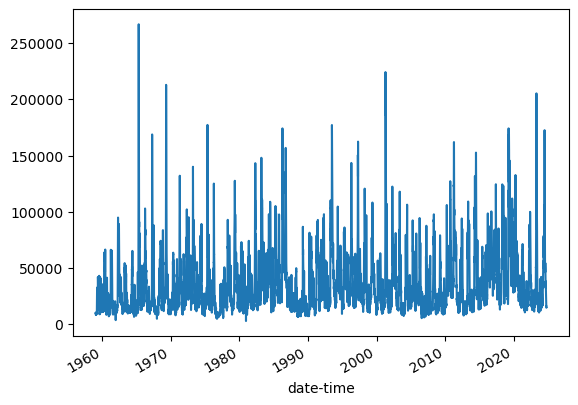

In [33]:
data['value'].plot()

In [34]:
data_80s = data.loc['1980':'1989']

(0.0, 182785.0)

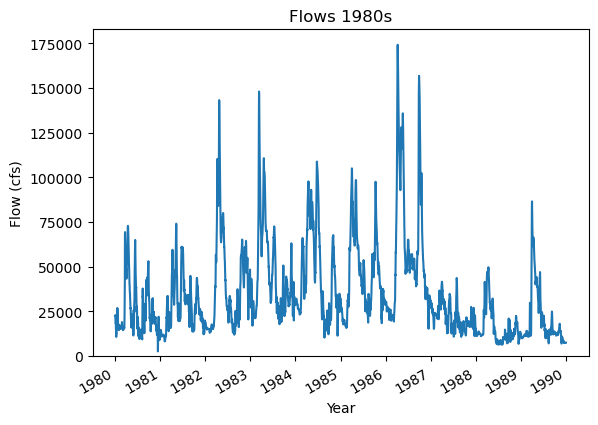

In [35]:
ax = data_80s['value'].plot()
ax.set_title('Flows 1980s')
ax.set_xlabel('Year')
ax.set_ylabel('Flow (cfs)')
ax.set_ylim(bottom = 0)

In [36]:
#save figure
fig = ax.get_figure()
fig.savefig('1980sFlow.png')

<Axes: xlabel='date-time'>

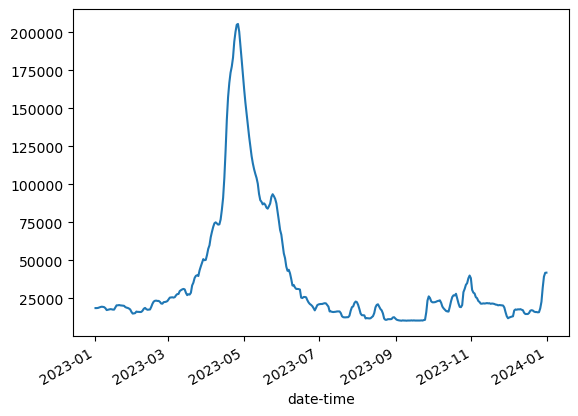

In [37]:
data.loc['2023','value'].plot()
#data.loc['6/2023','value'].plot()

#### Get Multuple time series and plot

In [40]:
ts_ids = ['LockDam_04.Elev.Inst.15Minutes.0.rev-MSL1912',
         'LockDam_04-Tailwater.Elev.Ave.1Day.1Day.merged-MSL1912']
multi_data = cwms.get_multi_timeseries_df(ts_ids=ts_ids, office_id='MVP', begin=datetime.now() - timedelta(days=10), melted = False)



In [41]:
multi_data

ts_id,LockDam_04-Tailwater.Elev.Ave.1Day.1Day.merged-MSL1912,LockDam_04.Elev.Inst.15Minutes.0.rev-MSL1912
units,ft,ft
date-time,,
2024-09-29 16:15:00+00:00,NaN,666.87
2024-09-29 16:30:00+00:00,NaN,666.93
2024-09-29 16:45:00+00:00,NaN,666.94
2024-09-29 17:00:00+00:00,NaN,666.96
2024-09-29 17:15:00+00:00,NaN,666.91
...,...,...
2024-10-09 19:15:00+00:00,NaN,666.97
2024-10-09 19:30:00+00:00,NaN,666.97


<Axes: xlabel='date-time'>

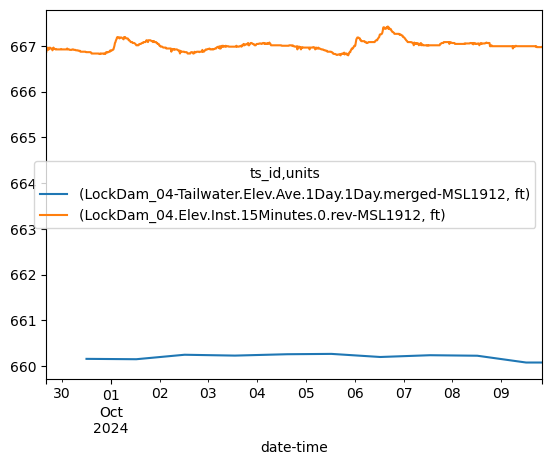

In [42]:
#need to use interpolate if data has Nan values.  used for data with different interval.  If data has same interval then 
#data.plot() can be used.
multi_data.interpolate('index').plot()

###  
###  
### Find Min, Mix and Median Values by month

In [40]:
# add month column to dataframe
data = data.assign(Month=data.index.month)

In [41]:
#can save data to a .csv
data.to_csv('test.csv')

In [42]:
#group by month and take the mean of the value column.
bymonth = data.groupby('Month')['value'].mean()

In [43]:
bymonth

Month
1     19149.242054
2     18725.158177
3     36015.014966
4     70887.424242
5     60203.274682
6     48564.106061
7     39329.134897
8     26347.986315
9     26698.984176
10    30814.590571
11    29788.764103
12    22245.186104
Name: value, dtype: float64

In [44]:
#group by month and get the min, max and median values of the value column
bymonth = data.groupby('Month')['value'].agg(['min','max','median'])

In [45]:
bymonth

,min,max,median
Month,,,
1,7100.0,90500.0,17500.0
2,6500.0,83500.0,16500.0
3,8130.0,153200.0,28600.0
4,12900.0,267000.0,63450.0
5,10700.0,206900.0,56750.0
6,6580.0,177200.0,44950.0
7,5050.0,172600.0,34900.0
8,4900.0,95000.0,22400.0
9,4600.0,156800.0,21900.0


<Axes: xlabel='Month'>

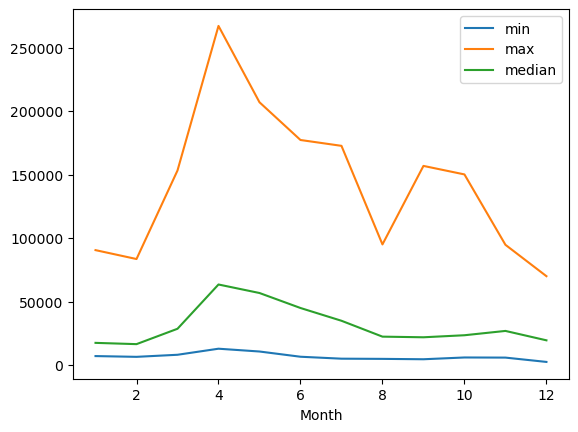

In [46]:
bymonth.plot()

###  
###  
### Find top 10 peak flows and dates

In [47]:
#add new column for year
data = data.assign(Year=data.index.year)

#group by the year and find the date for the max value for each year
maxdays = data.groupby('Year')['value'].idxmax()

#find the max value based on the date
MaxVals = data.loc[maxdays]

In [48]:
MaxVals

,value,quality-code,Month,Year
date-time,,,,
1959-07-13 12:00:00+00:00,42800.0,0,7,1959
1960-06-01 12:00:00+00:00,66200.0,0,6,1960
1961-03-27 12:00:00+00:00,66000.0,0,3,1961
1962-04-14 12:00:00+00:00,94700.0,0,4,1962
1963-04-03 12:00:00+00:00,54100.0,0,4,1963
...,...,...,...,...
2020-04-05 12:00:00+00:00,132600.0,0,4,2020
2021-04-19 12:00:00+00:00,71100.0,0,4,2021
2022-05-23 12:00:00+00:00,99800.0,0,5,2022


In [49]:
#find the 10 largest values
MaxVals.nlargest(10,'value')

,value,quality-code,Month,Year
date-time,,,,
1965-04-20 12:00:00+00:00,267000.0,0,4,1965
2001-04-18 12:00:00+00:00,224400.0,0,4,2001
1969-04-20 12:00:00+00:00,213000.0,0,4,1969
2023-04-26 12:00:00+00:00,205400.0,0,4,2023
1975-05-02 12:00:00+00:00,177300.0,0,5,1975
1993-06-26 12:00:00+00:00,177200.0,0,6,1993
1986-04-08 12:00:00+00:00,174200.0,0,4,1986
2019-04-03 12:00:00+00:00,174200.0,0,4,2019
2024-07-02 12:00:00+00:00,172600.0,0,7,2024


<Axes: >

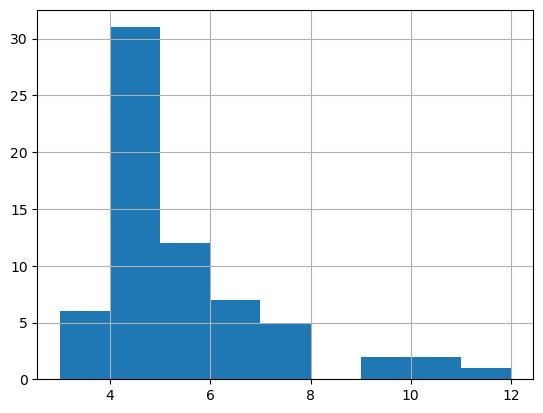

In [50]:
#create a histogram months peak value occur
MaxVals['Month'].hist(bins=9)

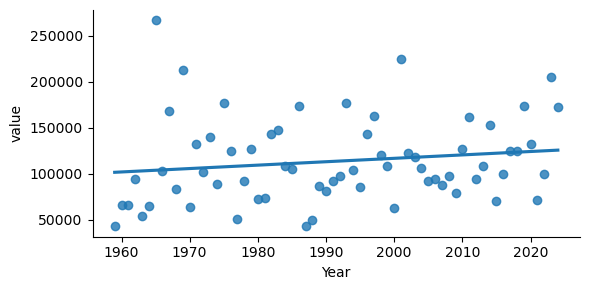

In [51]:
import seaborn as sns
g = sns.lmplot(
    data=MaxVals,
    x="Year", y="value",ci=None,height = 3, aspect=2)


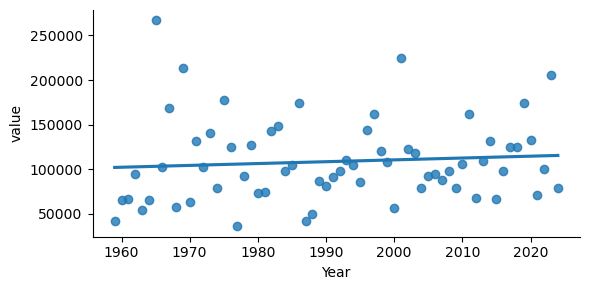

In [52]:
#look peak flows by season

data_spring = data[data.Month.isin([3, 4, 5])]

maxdays_spr = data_spring.groupby('Year')['value'].idxmax()
MaxVals_spr = data_spring.loc[maxdays_spr]

g = sns.lmplot(
    data=MaxVals_spr,
    x="Year", y="value",ci=None, height = 3, aspect=2)

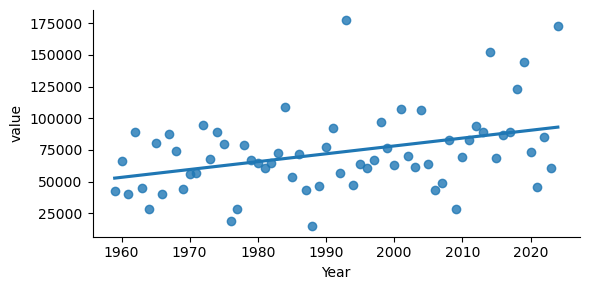

In [53]:
data_sum = data[data.Month.isin([6, 7, 8])]
maxdays_sum = data_sum.groupby('Year')['value'].idxmax()
MaxVals_sum = data_sum.loc[maxdays_sum]
MaxVals_sum.nlargest(10,'value')
g = sns.lmplot(
    data=MaxVals_sum,
    x="Year", y="value",ci=None, height = 3, aspect=2)

In [54]:
def season_max(data,months):
    data_s = data[data.Month.isin(months)]
    maxdays_s = data_s.groupby('Year')['value'].idxmax()
    MaxVals_s = data_s.loc[maxdays_s]
    return MaxVals_s

In [55]:
from scipy.stats import linregress

seasons = [['Spring',[3,4,5]],
           ['Summer',[6,7,8]],
           ['Fall',[9,10,11]],
           ['Winter',[12,1,2]]]

MaxVals_comb = pd.DataFrame()

for season,months in seasons:
    MaxVal = season_max(data,months)
    MaxVal = MaxVal.assign(Season=season)
    
    slope, intercept, r_value, p_value, std_err = linregress(MaxVal.Year, MaxVal.value)
    print(season,slope, p_value)
    MaxVals_comb = pd.concat([MaxVals_comb, MaxVal], ignore_index=True)

Spring 206.89280868385345 0.4917968752694828
Summer 618.5909612775284 0.0020244541550910266
Fall 284.2208537730927 0.11399626297532245
Winter 258.4260515603799 0.01028858717640802


In [56]:
MaxVals_comb

,value,quality-code,Month,Year,Season
0,41800.0,0,5,1959,Spring
1,65200.0,0,5,1960,Spring
2,66000.0,0,3,1961,Spring
3,94700.0,0,4,1962,Spring
4,54100.0,0,4,1963,Spring
...,...,...,...,...,...
259,90500.0,0,1,2020,Winter
260,31200.0,0,12,2021,Winter
261,22300.0,0,12,2022,Winter
262,41800.0,0,12,2023,Winter


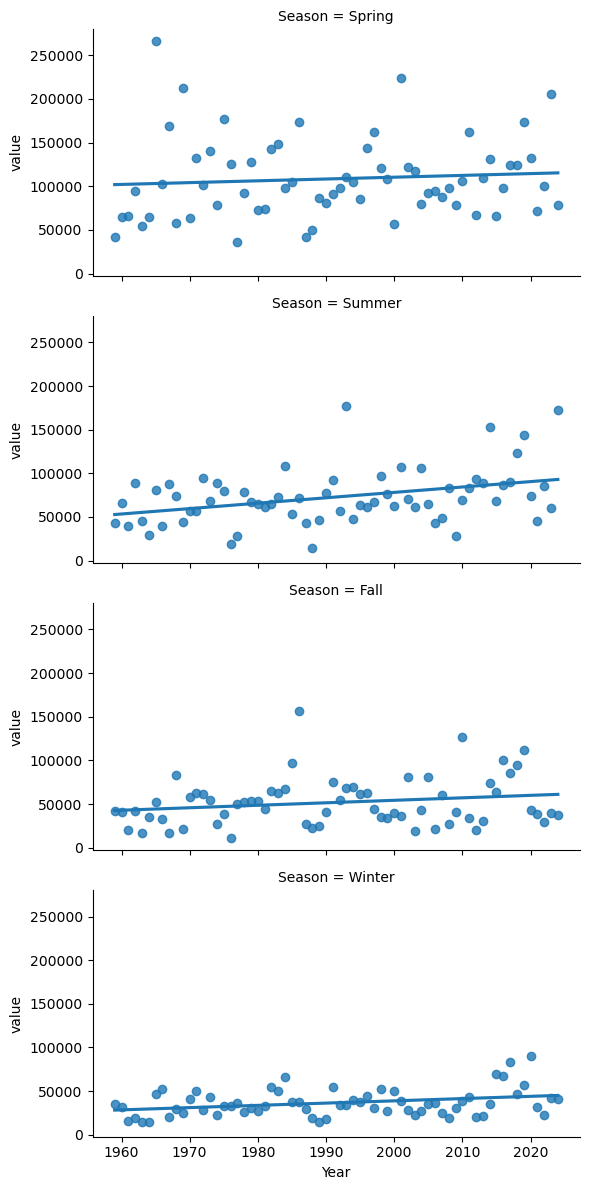

In [57]:
g = sns.lmplot(
    data=MaxVals_comb,
    x="Year", y="value",row="Season",ci=None, height = 3, aspect=2)

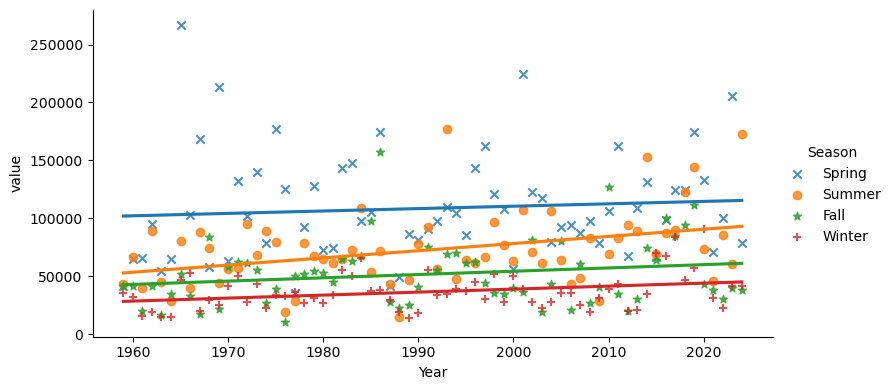

In [58]:
g = sns.lmplot(
    data=MaxVals_comb,
    x="Year", y="value",hue="Season",markers=['x', 'o', '*','+'],ci=None, height = 4, aspect=2)

### Make USGS style Percentile plot

https://or.water.usgs.gov/cgi-bin/grapher/graph_pctl_setup.pl?basin_id=cowlitz&site_id=14243000

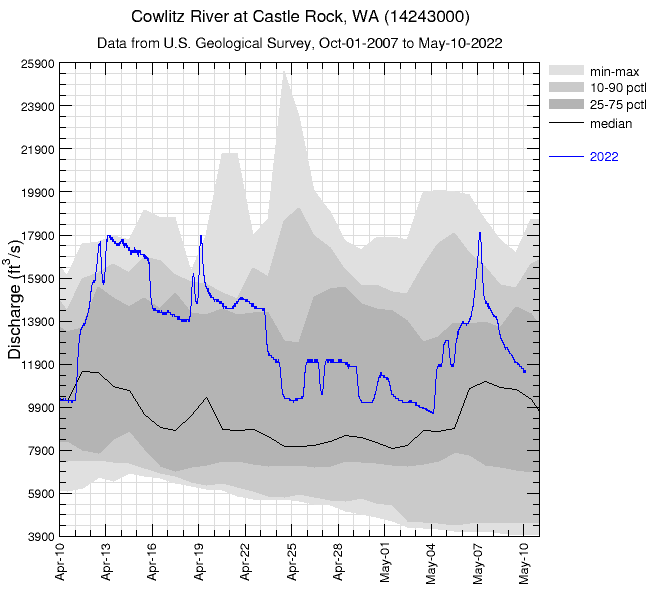

In [59]:
# Create a column for the Month/Day Want to display data by wateryear
import numpy as np

data = data.assign(MM_DD=pd.to_datetime(np.where(data.Month >= 10, data.index.strftime('%m-%d-2019'), data.index.strftime('%m-%d-2020'))))

data = data.assign(Water_Yr=np.where(data.Month >= 10, data.index.year + 1, data.index.year))

In [60]:
data.to_csv('Water_Year.csv')

In [61]:
# Create A pivot Table by Month/Day and Year
table = pd.pivot_table(data, values='value', index='MM_DD',columns=['Water_Yr'])

In [62]:
table

Water_Yr,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
MM_DD,,,,,,,,,,,,,,,,,,,,,
2019-10-01,NaN,37900.0,20000.0,11000.0,22000.0,13700.0,25400.0,38500.0,12300.0,9100.0,...,28500.0,26800.0,77300.0,42400.0,63200.0,70400.0,26700.0,16600.0,15600.0,22300.0
2019-10-02,NaN,37500.0,18600.0,11000.0,21900.0,16400.0,24400.0,39200.0,12100.0,9100.0,...,28300.0,26400.0,76600.0,42700.0,64000.0,70600.0,26400.0,16600.0,15600.0,22400.0
2019-10-03,NaN,34800.0,18300.0,11500.0,22900.0,14400.0,23500.0,38600.0,10900.0,9500.0,...,31400.0,25300.0,76000.0,44600.0,61500.0,71100.0,26000.0,16700.0,15500.0,22700.0
2019-10-04,NaN,32800.0,16700.0,11300.0,23000.0,13200.0,23300.0,43300.0,11000.0,10500.0,...,33900.0,18100.0,75600.0,47200.0,65500.0,75000.0,25400.0,16300.0,15400.0,23100.0
2019-10-05,NaN,26600.0,14300.0,10600.0,21500.0,13000.0,21400.0,44700.0,10900.0,11100.0,...,35000.0,16100.0,74500.0,49500.0,64800.0,79900.0,23800.0,15900.0,15300.0,23300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,35000.0,17800.0,9600.0,24600.0,13000.0,26600.0,31400.0,13200.0,9000.0,41000.0,...,27800.0,99300.0,32300.0,58500.0,70500.0,25300.0,18900.0,17300.0,23500.0,NaN
2020-09-27,38900.0,16600.0,8800.0,25700.0,15500.0,26700.0,29600.0,11700.0,8800.0,45400.0,...,27700.0,100200.0,33400.0,59300.0,71500.0,26100.0,19000.0,17400.0,26200.0,NaN
2020-09-28,38500.0,20200.0,8700.0,22100.0,14000.0,26100.0,33500.0,11800.0,8900.0,50600.0,...,26400.0,94500.0,36900.0,60600.0,72200.0,26900.0,18900.0,17200.0,25100.0,NaN


In [63]:
# calculate the percentile line to define the regions displayed in the plot.
percentiles = np.array([0,10,25,75,90,100])

Perc_Table = pd.DataFrame()
for per in percentiles:
    Perc_Table[per]=table.quantile(per/100, axis = 1)

In [64]:
Perc_Table

,0,10,25,75,90,100
MM_DD,,,,,,
2019-10-01,6400.0,11040.0,14300.0,35100.0,51880.0,150100.0
2019-10-02,6400.0,11400.0,14900.0,35300.0,50220.0,147700.0
2019-10-03,6400.0,11500.0,14400.0,34800.0,48640.0,143500.0
2019-10-04,6400.0,11120.0,15000.0,36000.0,47120.0,137000.0
2019-10-05,6400.0,10720.0,14300.0,35000.0,47580.0,129000.0
...,...,...,...,...,...,...
2020-09-26,4600.0,11420.0,14400.0,35000.0,50720.0,146800.0
2020-09-27,5400.0,11700.0,14400.0,35600.0,50980.0,153400.0
2020-09-28,6200.0,12040.0,14000.0,36900.0,51000.0,156800.0


In [65]:
#get time series for current year
curYear = table[2024].dropna()

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from matplotlib import cm

In [67]:
#function to create historical percentile plots.
def USGSplot(Perc_Table,curYear,percentiles,units,title,Startyear):

    n = len(percentiles) # change this value for the number of iterations/percentiles

    colormap = cm.jet_r

    labels = ['Much Below Normal (Lowest to 10th Percentile)','Below Normal (10th to 25th Percentile)', 'Normal (25th to 75th Percentile)',' Above Normal (75th to 90th Percentile)', 'Much Above Normal (90th Percentile to Highest)']
    #plt.style.use('seaborn-whitegrid')   
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16,8))
    
    ax1.plot(curYear,color='k',linewidth=3,label='Current Water Year (2023)')
                       
             
    for i in range(n-1):
        ax1.fill_between(Perc_Table.index, Perc_Table[percentiles[i]],Perc_Table[percentiles[i+1]],color=colormap((i+1)/(n)),alpha=0.5, label=labels[i])

    hfmt = mdates.DateFormatter('%b-%d')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.50, -0.05),
          fancybox=True, shadow=True, ncol=3,fontsize=12)
    ax1.xaxis.set_major_formatter(hfmt)
    ax1.set_title(("%s: Current Year vs Historical Percetiles (%s-Present)") %(title, str(Startyear)), fontsize=18)
    ax1.tick_params(labelsize=14)

    ax1.set_ylabel(('Daily Average %s') %(units), fontsize=16)
    ax1.margins(x=0,y=0)
    #plt.savefig('HistoricalPlot.png',bbox_inches='tight')
    
    #plt.close()

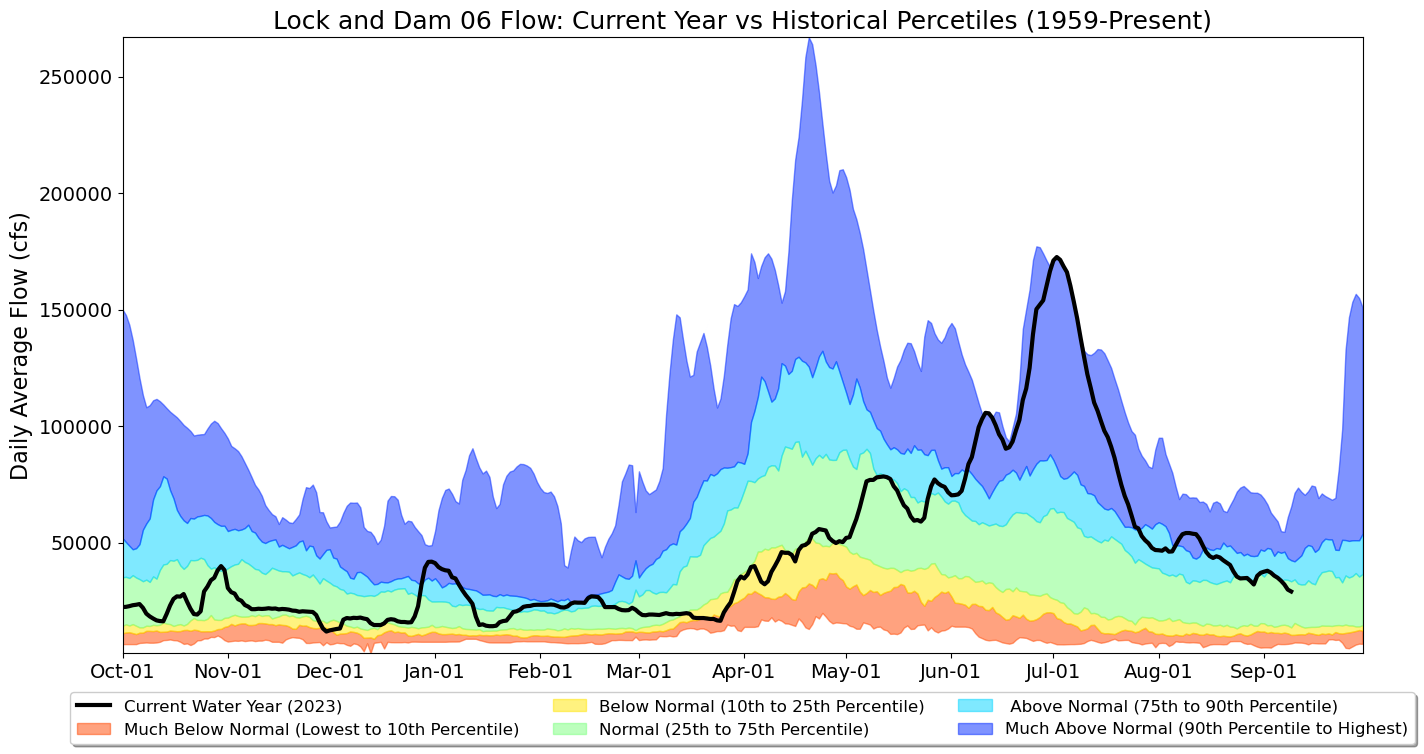

In [68]:
USGSplot(Perc_Table,curYear,percentiles,'Flow (cfs)','Lock and Dam 06 Flow',1959)

https://www.mvp-wc.usace.army.mil/reports/LockDam_06.Report.shtml
